# Analysis: Jaccard Similarity (TWITTER)

In [1]:
# Using graph-tool in Google Colab
!pip install -q condacolab
import condacolab
condacolab.install()
!mamba install -q graph-tool

✨🍰✨ Everything looks OK!


In [2]:
import graph_tool.all as gt
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib
import seaborn
import pandas as pd
import numpy as np

In [3]:
pd.set_option('display.max_columns', None) # Display all the columns

# Set seaborn style
seaborn.set_style("whitegrid")
seaborn.set_context("poster")

# Configure font
#matplotlib.rcParams['font.sans-serif'] = "Fira Sans"
#matplotlib.rcParams['font.family'] = "sans-serif"

In [4]:
first_person_color = '#fa824c'
second_person_color = '#00bdbf'
third_person_color = '#f3f1e9'

In [5]:
# Load graph
g = gt.load_graph("data/twitter.graphml", fmt='graphml')

In [6]:
# See all properties
g.list_properties()

Betweenness Centrality                 (vertex)  (type: long double)
Closeness Centrality                   (vertex)  (type: long double)
Degree                                 (vertex)  (type: int32_t)
Eccentricity                           (vertex)  (type: long double)
Eigenvector Centrality                 (vertex)  (type: long double)
Harmonic Closeness Centrality          (vertex)  (type: long double)
In-Degree                              (vertex)  (type: int32_t)
Modularity Class                       (vertex)  (type: int32_t)
Out-Degree                             (vertex)  (type: int32_t)
PageRank                               (vertex)  (type: long double)
Weighted Degree                        (vertex)  (type: long double)
Weighted In-Degree                     (vertex)  (type: long double)
Weighted Out-Degree                    (vertex)  (type: long double)
_graphml_vertex_id                     (vertex)  (type: string)
author                                 (vertex)  (type:

In [7]:
user = "openp2pdesign"
usern = 0

In [8]:
# Get my node
for v in g.vertices():
    a = g.vp.label[g.vertex(v)]
    if (a == user):
        print(v)
        usern = v

0


In [9]:
print(g.vp.label[g.vertex(usern)])

openp2pdesign


In [10]:
# Calculate similarity
s = gt.vertex_similarity(g, "jaccard")

In [11]:
# Make this an internal property
jprop = g.new_vertex_property("double")
g.vertex_properties["jaccard_"+user] = jprop

In [12]:
# Associate the value of Jaccard's similarity relative to my node to all nodes
for i,k in enumerate(s[usern].a):
    v = g.vertex(i)
    g.vp["jaccard_"+user][i] = k

In [13]:
# Save the graph
g.save("data/"+user+"-jaccard_twitter.graphml")

In [14]:
ng = nx.read_graphml("data/"+user+"-jaccard_twitter.graphml")

In [15]:
df = pd.DataFrame.from_dict(dict(ng.nodes(data=True)), orient='index')

In [16]:
# df.head()

In [17]:
df.index.rename('Id', inplace=True)

In [18]:
df.rename(columns={"label": "Label"}, inplace=True)

In [19]:
df.to_csv("data/"+user+"-jaccard_similarity_twitter.csv")

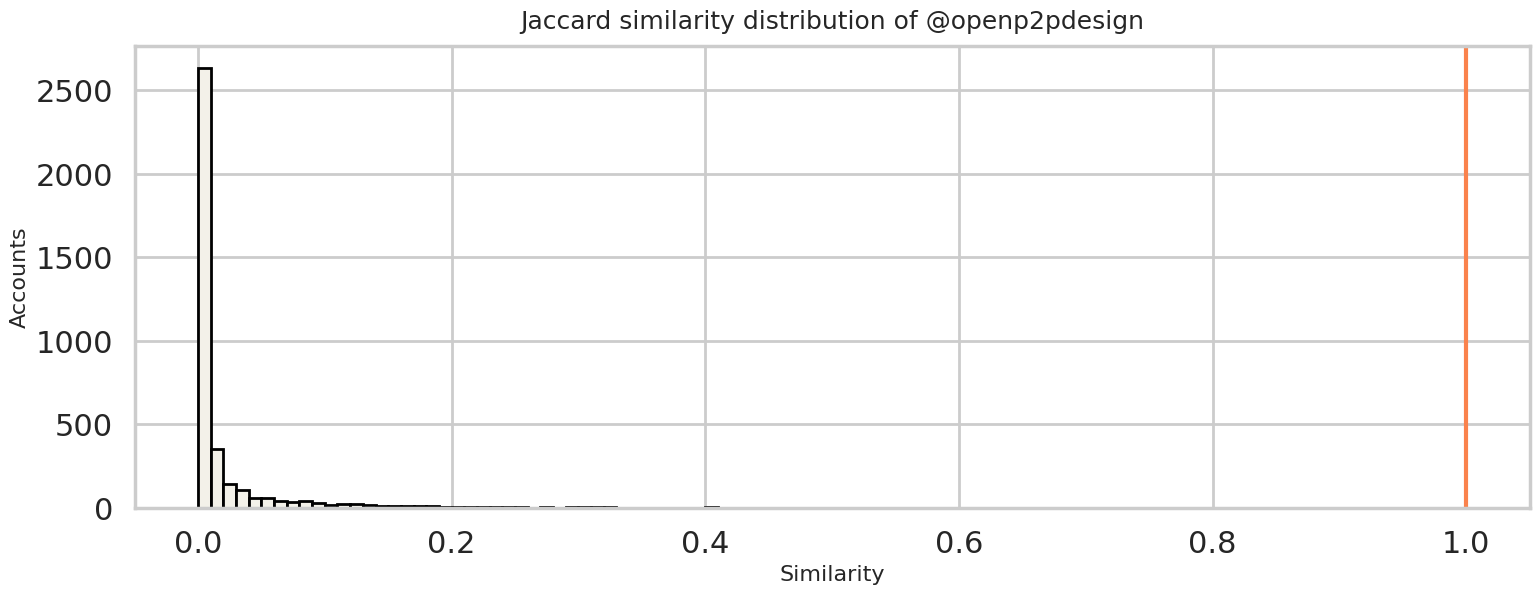

In [20]:
# Get the author's position
author = df.loc[df['Label'] == "openp2pdesign"]
# Plot the data
ax = df["jaccard_"+user].plot(kind="hist", figsize=(18,6), bins=100, color=third_person_color, edgecolor='black', legend=False)
ax.axvline(author.iloc[0]["jaccard_"+user], color=first_person_color)
plt.ylabel('Accounts', fontsize=16)
plt.xlabel('Similarity', fontsize=16)
plt.title("Jaccard similarity distribution of @"+user, fontsize=18, y=1.02)
plt.savefig("png/similarity_1st2ndperson-TWITTER.png", format='png', dpi=300, bbox_inches="tight")
plt.savefig("svg/similarity_1st2ndperson-TWITTER.svg", bbox_inches="tight")